In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# All 8 CSV file paths containing the dice scores
filepaths = ["dataframeFlairBiasToT1cBias.csv", "dataframeT1BiasToT1cBias.csv", "dataframeT2BiasToT1cBias.csv",
             "dataframeDTIEddyFAToT1cBias.csv", "dataframeDTIEddyMDToT1cBias.csv", "dataframeASLToT1cBias.csv",
             "dataframeSWIBiasToT1cBias.csv"]
dfs = [pd.read_csv(filepath) for filepath in filepaths]

In [4]:
result_df = pd.concat(dfs, axis=1)
result_df.tail(5)

,DS FlairBiasToT1cBias,DS T1BiasToT1cBias,DS T2BiasToT1cBias,DS DTIEddyFAToT1cBias,DS DTIEddyMDToT1cBias,DS ASLToT1cBias,DS SWIBiasToT1cBias
112,0.121478,0.121968,0.122163,0.120550,0.037226,0.119344,0.122495
113,0.207791,0.216099,0.207733,0.204788,0.047712,0.213600,0.213748
114,0.182015,0.185385,0.184450,0.177303,0.050051,0.181415,0.186124
115,0.131700,0.127161,0.131925,0.128118,0.035771,0.124571,0.137455
116,0.152193,0.152212,0.153594,0.147083,0.042890,0.154169,0.153011


In [5]:
# Drop rows where all values are 0
updated_df = result_df
updated_df = updated_df[updated_df.ne(0).any(axis=1)]
updated_df.head(10)

,DS FlairBiasToT1cBias,DS T1BiasToT1cBias,DS T2BiasToT1cBias,DS DTIEddyFAToT1cBias,DS DTIEddyMDToT1cBias,DS ASLToT1cBias,DS SWIBiasToT1cBias
0,0.198149,0.205774,0.202825,0.196674,0.047953,0.199390,0.202279
1,0.186876,0.186717,0.188094,0.184350,0.044048,0.188385,0.189858
2,0.168666,0.172973,0.169949,0.167040,0.045824,0.164235,0.165234
3,0.246246,0.247311,0.244971,0.237331,0.056975,0.245394,0.245945
4,0.136167,0.131353,0.136878,0.135547,0.039579,0.134583,0.137841
5,0.172593,0.174431,0.175697,0.171058,0.046944,0.171726,0.176739
6,0.155654,0.155858,0.156566,0.154521,0.037084,0.156306,0.158051
7,0.167095,0.167550,0.168789,0.163275,0.045163,0.163604,0.168802
8,0.170944,0.181768,0.171466,0.168769,0.046693,0.170137,0.168558
9,0.184462,0.189292,0.186899,0.187487,0.052721,0.188815,0.190372


In [6]:
# Melt the dataframe to long format
melted_df = updated_df.melt(var_name="Modality", value_name="Dice")

# Filter out any NaN values that may result from melting
melted_df = melted_df.dropna()

In [7]:
melted_df

,Modality,Dice
0,DS FlairBiasToT1cBias,0.198149
1,DS FlairBiasToT1cBias,0.186876
2,DS FlairBiasToT1cBias,0.168666
3,DS FlairBiasToT1cBias,0.246246
4,DS FlairBiasToT1cBias,0.136167
...,...,...
814,DS SWIBiasToT1cBias,0.122495
815,DS SWIBiasToT1cBias,0.213748
816,DS SWIBiasToT1cBias,0.186124
817,DS SWIBiasToT1cBias,0.137455


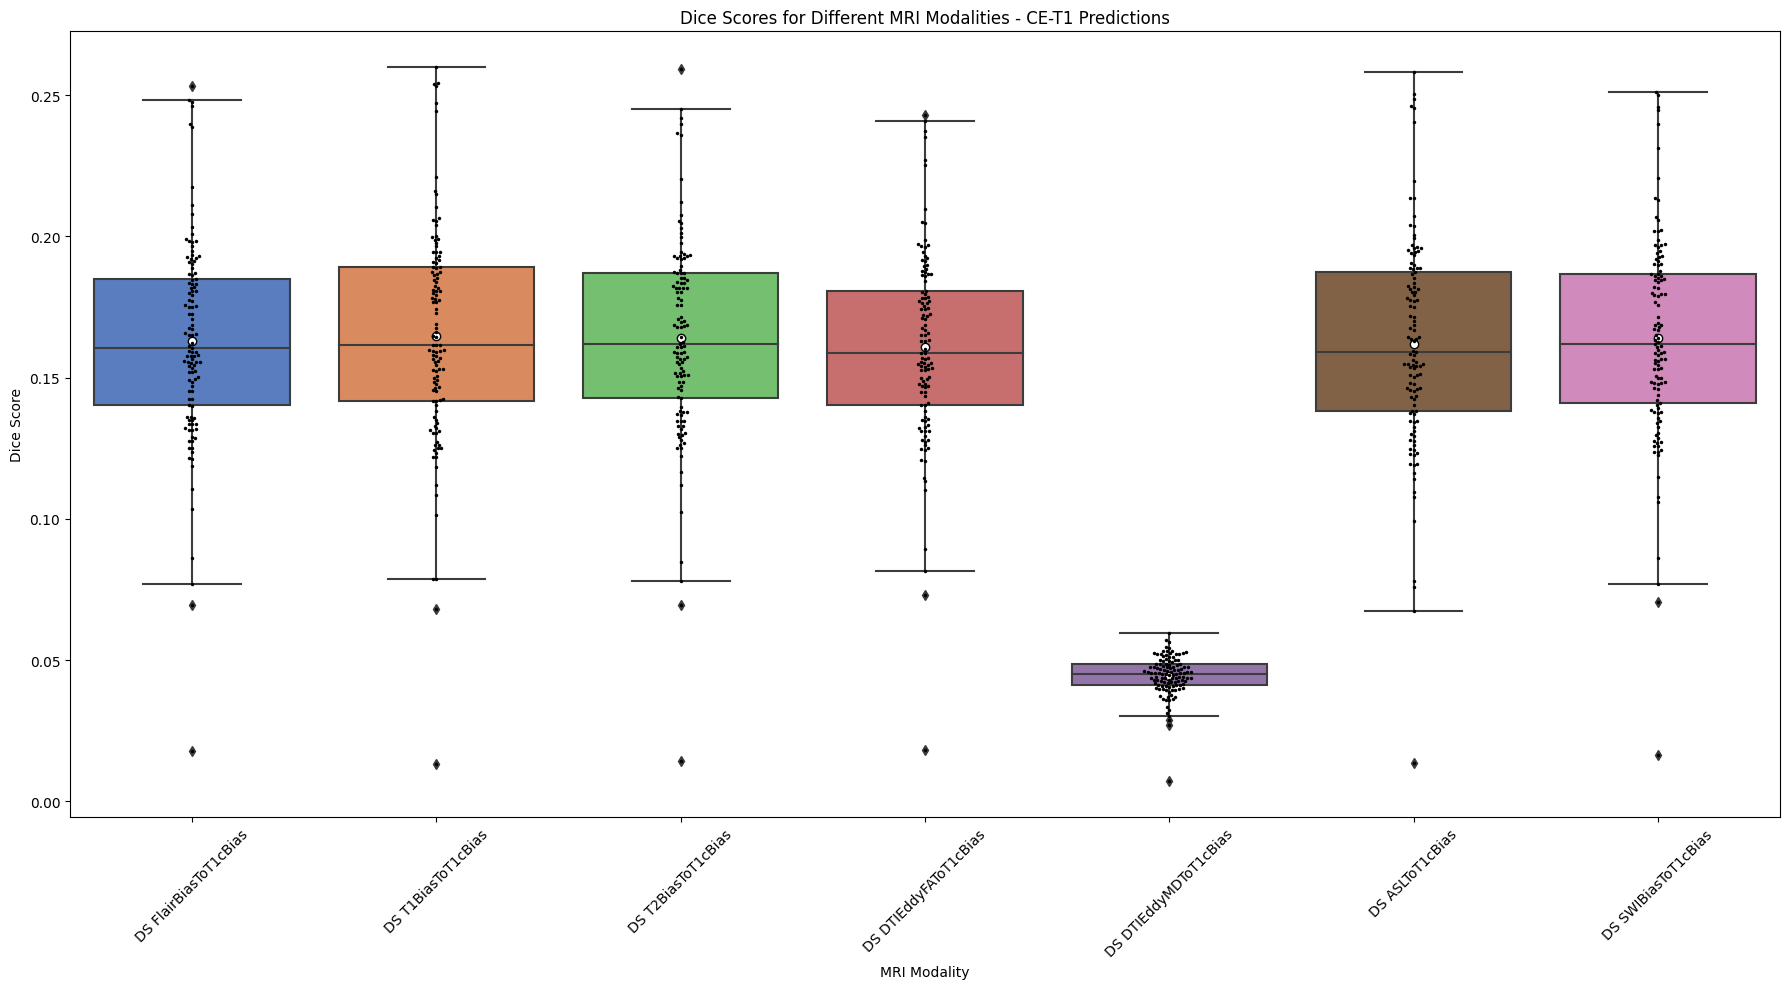

In [9]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=melted_df, x='Modality', y='Dice', palette='muted', showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})
sns.swarmplot(data=melted_df, x='Modality', y='Dice', color='black', size=2.5)


plt.title('Dice Scores for Different MRI Modalities - CE-T1 Predictions')
plt.ylabel('Dice Score')
plt.xlabel('MRI Modality')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()